In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_excel('credit-data-training (3).xlsx')
df_train.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [3]:
df_train.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          156 non-null float64
Most-valuable-available-asset        500 non-null int64
Age-years                            488 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 no

In [5]:
# Duration-in-Current-address contains 344 nulls - Remove field
# Age-years contains 12 nulls - Remove entries

In [6]:
df_train = df_train.drop('Duration-in-Current-address', axis=1)
df_train = df_train.dropna(subset=['Age-years'], how='all')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1 to 499
Data columns (total 19 columns):
Credit-Application-Result            488 non-null object
Account-Balance                      488 non-null object
Duration-of-Credit-Month             488 non-null int64
Payment-Status-of-Previous-Credit    488 non-null object
Purpose                              488 non-null object
Credit-Amount                        488 non-null int64
Value-Savings-Stocks                 488 non-null object
Length-of-current-employment         488 non-null object
Instalment-per-cent                  488 non-null int64
Guarantors                           488 non-null object
Most-valuable-available-asset        488 non-null int64
Age-years                            488 non-null float64
Concurrent-Credits                   488 non-null object
Type-of-apartment                    488 non-null int64
No-of-Credits-at-this-Bank           488 non-null object
Occupation                           488 non

In [7]:
target_name = 'Credit-Application-Result'
numeric_features = list(df_train.describe().columns)
qualitative_features = list(df_train.drop(numeric_features, axis=1).drop(target_name, axis=1).columns)

In [8]:
# sns.pairplot(df_train, hue=target_name, palette='Set1', kind='reg')

In [9]:
df_train_dummy = pd.get_dummies(df_train)
# for feat in qualitative_features:
#     df_train_dummy = df_train_dummy.append(pd.get_dummies(df_train_dummy[feat], dummy_na=False))
#     df_train_dummy.pop(feat)
# df_train_dummy.head()

In [10]:
df_train_dummy = df_train_dummy.drop(['Credit-Application-Result_Non-Creditworthy'], axis=1)

In [11]:
df_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1 to 499
Data columns (total 31 columns):
Duration-of-Credit-Month                                        488 non-null int64
Credit-Amount                                                   488 non-null int64
Instalment-per-cent                                             488 non-null int64
Most-valuable-available-asset                                   488 non-null int64
Age-years                                                       488 non-null float64
Type-of-apartment                                               488 non-null int64
Occupation                                                      488 non-null int64
No-of-dependents                                                488 non-null int64
Telephone                                                       488 non-null int64
Foreign-Worker                                                  488 non-null int64
Credit-Application-Result_Creditworthy                         

In [12]:
from sklearn.feature_selection import SelectKBest

In [51]:
selection = SelectKBest(k=5)

In [52]:
selection.fit(df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis=1), df_train_dummy['Credit-Application-Result_Creditworthy'])

SelectKBest(k=5, score_func=<function f_classif at 0x000000000D15DF28>)

In [53]:
len(selection.scores_)

30

In [54]:
features = df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis=1).columns

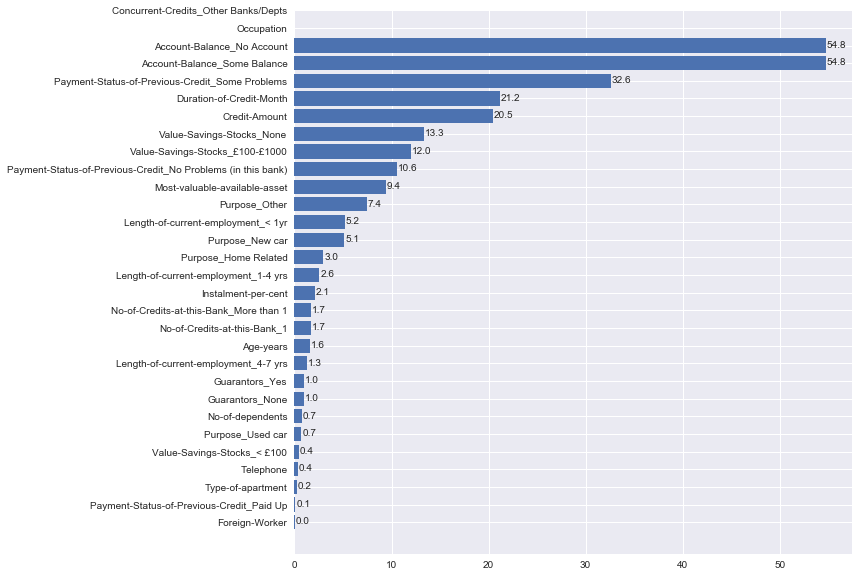

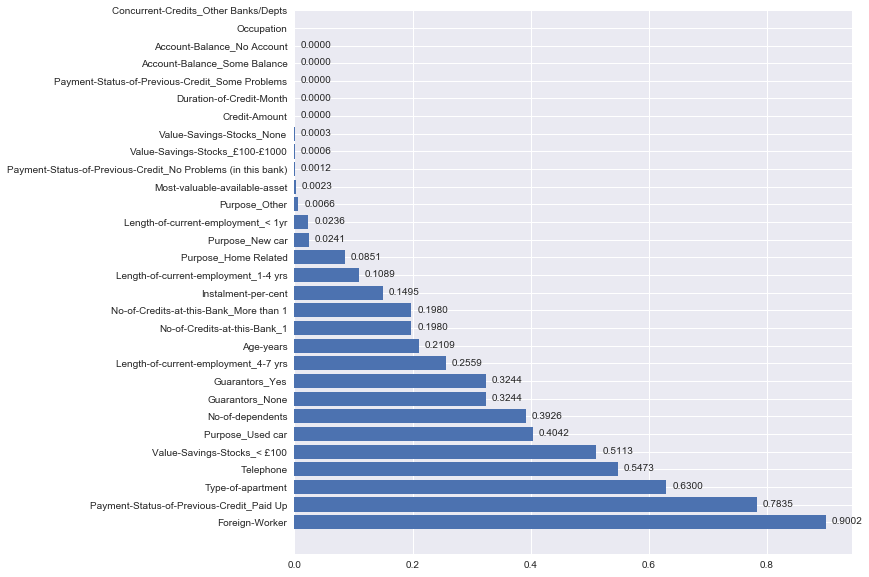

In [93]:
plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30), 
         selection.scores_[selection.scores_.argsort()], 
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.1,
                 y=p.get_y()+.3,
                 s="%0.1f" % p.get_width())
plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30),
         selection.pvalues_[selection.scores_.argsort()],
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.01,
                 y=p.get_y()+.3,
                 s="%0.4f" % p.get_width())

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


array([ True,  True, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False], dtype=bool)

In [232]:
features_by_importance = features[selection.scores_.argsort()[::-1]]
p_values_by_importance = selection.pvalues_[selection.scores_.argsort()[::-1]]
use_features = []
for idx in range(len(features_by_importance)):
    if ~np.isnan(p_values_by_importance[idx]):
        if p_values_by_importance[idx] <= 0.15:
            use_features.append(features_by_importance[idx])
            print(features_by_importance[idx])

Account-Balance_No Account
Account-Balance_Some Balance
Payment-Status-of-Previous-Credit_Some Problems
Duration-of-Credit-Month
Credit-Amount
Value-Savings-Stocks_None
Value-Savings-Stocks_£100-£1000
Payment-Status-of-Previous-Credit_No Problems (in this bank)
Most-valuable-available-asset
Purpose_Other
Length-of-current-employment_< 1yr
Purpose_New car
Purpose_Home Related
Length-of-current-employment_1-4 yrs
Instalment-per-cent


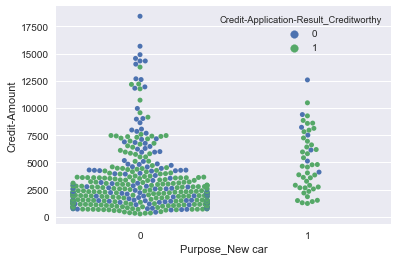

In [269]:
sns.swarmplot(data=df_train_dummy, x='Purpose_New car', y='Credit-Amount', 
          hue='Credit-Application-Result_Creditworthy')

In [233]:
df_features = df_train_dummy[use_features]
df_labels = df_train_dummy['Credit-Application-Result_Creditworthy']
df_features.head()

,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Some Problems,Duration-of-Credit-Month,Credit-Amount,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Payment-Status-of-Previous-Credit_No Problems (in this bank),Most-valuable-available-asset,Purpose_Other,Length-of-current-employment_< 1yr,Purpose_New car,Purpose_Home Related,Length-of-current-employment_1-4 yrs,Instalment-per-cent
1,0,1,0,4,1494,0,1,0,1,0,1,0,1,0,1
2,0,1,0,4,1544,1,0,1,1,0,0,0,1,1,2
3,0,1,0,4,3380,1,0,1,1,0,0,0,1,1,1
4,1,0,0,6,343,1,0,0,1,0,1,0,1,0,4
5,0,1,0,6,362,0,0,1,3,0,1,0,1,0,4


In [234]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=0)

In [235]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Logistic Regression")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Logistic Regression
---------------------------------
Accuracy:	0.7551
Precision:	0.7623
Recall:		0.9300

             precision    recall  f1-score   support

          0       0.72      0.38      0.50        47
          1       0.76      0.93      0.84       100

avg / total       0.75      0.76      0.73       147

[[18 29]
 [ 7 93]]


In [236]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Random ForestClassifier")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Random ForestClassifier
---------------------------------
Accuracy:	0.7143
Precision:	0.7589
Recall:		0.8500

             precision    recall  f1-score   support

          0       0.57      0.43      0.49        47
          1       0.76      0.85      0.80       100

avg / total       0.70      0.71      0.70       147

[[20 27]
 [15 85]]


In [237]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Gaussian Naive-Bayes")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Gaussian Naive-Bayes
---------------------------------
Accuracy:	0.7483
Precision:	0.7603
Recall:		0.9200

             precision    recall  f1-score   support

          0       0.69      0.38      0.49        47
          1       0.76      0.92      0.83       100

avg / total       0.74      0.75      0.72       147

[[18 29]
 [ 8 92]]


In [238]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Decision Tree")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Decision Tree
---------------------------------
Accuracy:	0.6395
Precision:	0.7117
Recall:		0.7900

             precision    recall  f1-score   support

          0       0.42      0.32      0.36        47
          1       0.71      0.79      0.75       100

avg / total       0.62      0.64      0.62       147

[[15 32]
 [21 79]]


In [239]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Random ForestClassifier")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Random ForestClassifier
---------------------------------
Accuracy:	0.7007
Precision:	0.7333
Recall:		0.8800

             precision    recall  f1-score   support

          0       0.56      0.32      0.41        47
          1       0.73      0.88      0.80       100

avg / total       0.68      0.70      0.67       147

[[15 32]
 [12 88]]


In [251]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Support Vector Machine")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Support Vector Machine
---------------------------------
Accuracy:	0.6803
Precision:	0.6803
Recall:		1.0000

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        47
          1       0.68      1.00      0.81       100

avg / total       0.46      0.68      0.55       147

[[  0  47]
 [  0 100]]
